      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float6

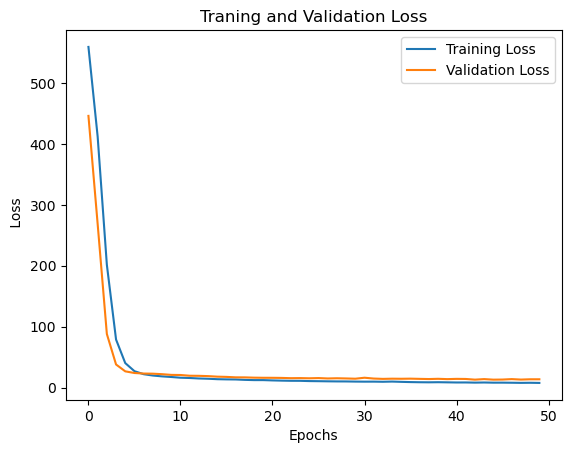

4/4 [==============================] - 0s 2ms/step - loss: 11.4431 - mean_absolute_error: 2.2711
Test Loss:  11.44
Test Mean absolute Error (MAE):  2.27
4/4 [==============================] - 0s 1ms/step
Predicted vs Actual values for the test set: 

Predicted:28.11, Actual: 23.60
Predicted:34.70, Actual: 32.40
Predicted:17.09, Actual: 13.60
Predicted:25.99, Actual: 22.80
Predicted:16.12, Actual: 16.10
Predicted:19.55, Actual: 20.00
Predicted:17.00, Actual: 17.80
Predicted:12.26, Actual: 14.00
Predicted:24.62, Actual: 19.60
Predicted:18.11, Actual: 16.80
Predicted:21.20, Actual: 21.50
Predicted:17.64, Actual: 18.90
Predicted:8.40, Actual: 7.00
Predicted:18.66, Actual: 21.20
Predicted:18.92, Actual: 18.50
Predicted:24.70, Actual: 29.80
Predicted:20.32, Actual: 18.80
Predicted:10.79, Actual: 10.20
Predicted:45.89, Actual: 50.00
Predicted:13.76, Actual: 14.10
All libs are installed


In [ ]:
import tensorflow as tf
import pandas as pd # handles loading and handaling for the dataset
import sklearn
import matplotlib.pyplot as plt
import numpy as np # for numerical operations, math stuff
from sklearn.preprocessing import StandardScaler # this is for scaling features
from tensorflow.keras.models import Sequential # building the nural network
from tensorflow.keras.layers import Dense # adding layers to neural network

# un comment any commented print line to see what the result/output is #

#in this neural network example, we will firstly load the boston housing data set
# scale the features to improve the neural network preformance
# build and train the neural network with hidden layers to predict home prices 
# evlauate the models accuracy when achieving an average prediction error (MAE) of about $2,300

#traning set:
from sklearn.model_selection import train_test_split


#loading the boston housing data set

DataFrame = pd.read_csv('boston_house_prices.csv', header = 1) # saying panda to use the second row as the actual column headers and not first row


#displaying the first couple of rows to see and understand the structure
print(DataFrame.head())


#displaying basic info about the data set

print(DataFrame.info()) 

#spliting features (x) and target (y)

x = DataFrame.drop('MEDV', axis = 1) # all colums except 'MEDV'

y = DataFrame['MEDV']

# The output will say/print there are 506 rows ( aka data points) and 13 columns
print("Features shape:", x.shape) 

# The output will say/print that it is a 1 dimensional array containg 506 values (the meadian house prices im going to predict)
print("Target shape:", y.shape)

#spliting the data into traning and testing sets:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42 )


#printing the shapes of the splits (come back to write definition of what this line means - Ali 2024)

# traning 80% of the data

# 404 data points are used to train the model (results when printed)
print("Traning features shape:", x_train.shape)

#404 corresondes with the target values (results when printed)
print("Testing features shape:", x_test.shape)

#testing 20% of the data

# 102 data points were used to evaluate the model (results when printed)
print("Training target shape:", y_train.shape)

#there are 102 corresponding target values (results when printed)
print("Testing target shape:", y_test.shape)


#feature scaling

scaler = StandardScaler()

#fitting the scaler on the training data to transform both the traing and testing features
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#printing the first few rows of the scaled training data to comfirm
print("Scaled training features (First 5 rows): \n ")
print(x_train[:5])


#step 1 building the nural network
model = Sequential()

#input layer with and first hidden layer with 64 neurons
model.add(Dense(64, input_dim = x_train.shape[1], activation = 'relu'))

#second hidden layer with 32 neurons
model.add(Dense(32, activation = 'relu'))

#Output layer with 1 neuron (For regreession)
model.add(Dense(1, activation = 'linear'))

#step 2 Next we compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

#printing the model summary to understand the architecture

model.summary()



#Step 3 training the model using x_train and y_train

history = model.fit(
    x_train, y_train,      # Training data
    epochs = 50,            # Number of training cycles 
    batch_size = 10,       # Number of samples per batch
    validation_split = 0.2 # 20% of the training data used for validation

)

#visulaizing training history

#plot traning and validation loss

plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel(' Loss')
plt.legend()
plt.title('Traning and Validation Loss')
plt.show()


# (epochs = 50) This model will go through the entire dataset 50 times to learn patterns
# (batch_size) this model processes 10 samples ata time before updating the weights
# (validation_split = 0.2) this reserves 20% of the traning data for validation to monitor preformance on unseen data

#Step 4 evaluating the model on the test data

test_loss, test_mae = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss: .2f}")
print(f"Test Mean absolute Error (MAE): {test_mae: .2f}")


# Make predictions on the test set
predictions = model.predict(x_test)

#showing the first 20 predictions alongside actual values
print("Predicted vs Actual values for the test set: \n")
for i in range(20):
    print(f"Predicted:{predictions[i][0]:.2f}, Actual: {y_test.iloc[i]:.2f}" )






print("\n\nAll libs are installed")